In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris Setosa?
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Perceptron implements a single LTU network.
equivalent to using a SGDClassifier with `loss="perceptron"`, `learning_rate="constant"``, `eta0 = 1``, `penalty = None``

In [2]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [27]:
print(tf.__version__)

2.18.0


### Multi-layer Perceptron

In [15]:
# Importing necessary modules
import tensorflow.compat.v1 as tf    
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


In [17]:
# Normalize image values by dividing by 255 (pixel values range from 0 to 255)

gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale



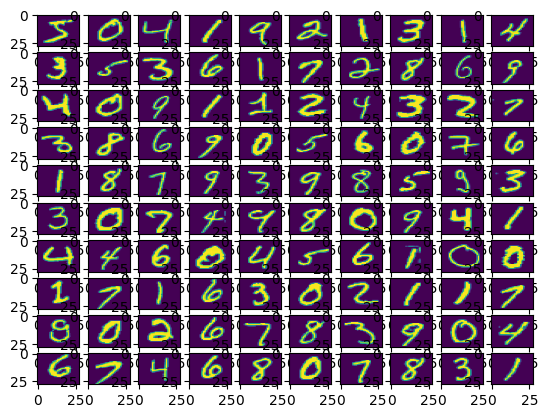

In [19]:
## Visualizing the first 10 images in the dataset and their labels

fig, ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28,28),
                        aspect='auto')
        k+=1
plt.show()

## Building the neural network model
- flatten layer: Reshapes the 2D (28 x 28) into a 1D array of 784 elements
- dense layer: fully connected layers with 256 (0-256 pixels) neurons and 128 neurons , both using the sigmoid activation function. 
- output layer: 10 neurons representing the 10 classes of digits (0-9) with sigmoid activation function. #1 neuron for each output.

In [25]:
model = Sequential([

    #Input layer
    Flatten(input_shape=(28, 28)),

    #Hidden layers
    Dense (256, activation = 'sigmoid'),
    Dense(128, activation='sigmoid'),

    #Output layer
    #Dense(10, activation='sigmoid')

    ### Commenting other options
    #Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#Compile the model 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 0s 11ms/step - loss: 2.1266 - accuracy: 0.3697 - val_loss: 1.8108 - val_accuracy: 0.6647
Epoch 2/10
24/24 [==============================] - 0s 7ms/step - loss: 1.4766 - accuracy: 0.7235 - val_loss: 1.1138 - val_accuracy: 0.8042
Epoch 3/10
24/24 [==============================] - 0s 8ms/step - loss: 0.9262 - accuracy: 0.8117 - val_loss: 0.7170 - val_accuracy: 0.8570
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.6423 - accuracy: 0.8589 - val_loss: 0.5214 - val_accuracy: 0.8825
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 0.4933 - accuracy: 0.8836 - val_loss: 0.4192 - val_accuracy: 0.8985
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 0.4111 - accuracy: 0.8964 - val_loss: 0.3610 - val_accuracy: 0.9069
Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 0.3619 - accuracy: 0.9050 - val_loss: 0.3245 - val_accuracy: 0.9146
Epoch 8/10
24/24 [=

In [26]:
results = model.evaluate(x_test, y_test)
print('Test accuracy: ', round(results[1],4))

313/313 [==============================] - 0s 616us/step - loss: 0.2694 - accuracy: 0.9236
Test accuracy:  0.9236


In [28]:
## We took out the hidden layer with 256 neurons and the sigmoid activation function.

model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
model2.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

results = model2.evaluate(x_test, y_test)
print('Test accuracy: ', round(results[1],4))

Epoch 1/10
24/24 [==============================] - 0s 7ms/step - loss: 1.2424 - accuracy: 0.6850 - val_loss: 0.5616 - val_accuracy: 0.8638
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.8756 - val_loss: 0.3523 - val_accuracy: 0.9038
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.9054 - val_loss: 0.2941 - val_accuracy: 0.9193
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2932 - accuracy: 0.9189 - val_loss: 0.2620 - val_accuracy: 0.9289
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2631 - accuracy: 0.9273 - val_loss: 0.2407 - val_accuracy: 0.9339
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.9332 - val_loss: 0.2227 - val_accuracy: 0.9386
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9384 - val_loss: 0.2101 - val_accuracy: 0.9432
Epoch 8/10
24/24 [==

- Without proper regularization techniques, MLPs can overfit the training data, leading to poor generalization

- Properly scaled or normalized data for optimal performance. 